In [4]:
# --- Resumen del bloque: importa librerías necesarias | gráficas con Matplotlib | visualizaciones con Seaborn. ---
# Importaciones
import pandas as pd
# Importaciones
import seaborn as sns
# Importaciones
import matplotlib.pyplot as plt

# Importaciones
import warnings

In [5]:
# Ignorar warnings
warnings.filterwarnings('ignore')

In [6]:
#Cargar el dataframe
df = pd.read_csv("/content/dfEncoding.csv")

In [7]:
# --- Resumen del bloque: pasos del análisis exploratorio (EDA). ---
df.head()

,Name,UPC,Price (excl. tax),Rating,Has Description,Image URL,Description,Availability,Category_Academic,Category_Add a comment,...,Category_Self Help,Category_Sequential Art,Category_Short Stories,Category_Spirituality,Category_Sports and Games,Category_Suspense,Category_Thriller,Category_Travel,Category_Womens Fiction,Category_Young Adult
0,A Light in the Attic,a897fe39b1053632,51.77,3,True,https://books.toscrape.com/media/cache/fe/72/f...,NaN,22,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Tipping the Velvet,90fa61229261140a,53.74,1,True,https://books.toscrape.com/media/cache/08/e9/0...,NaN,20,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Soumission,6957f44c3847a760,50.10,1,True,https://books.toscrape.com/media/cache/ee/cf/e...,NaN,20,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Sharp Objects,e00eb4fd7b871a48,47.82,4,True,https://books.toscrape.com/media/cache/c0/59/c...,NaN,20,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Sapiens: A Brief History of Humankind,4165285e1663650f,54.23,5,True,https://books.toscrape.com/media/cache/ce/5f/c...,NaN,20,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Outliers**

In [8]:
# --- Resumen del bloque: define funciones auxiliares | iteraciones sobre datos. ---
# Función auxiliar: mod outliers
def mod_outliers(df):
    df1 = df.copy()
    # Select only numeric columns for outlier modification
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]

    q1 = df_numeric.quantile(0.25)
    q3 = df_numeric.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

# Bucle for
    for col in numeric_cols:
# Bucle for
        for i in range(0, len(df_numeric[col])):
            if df_numeric[col][i] < lower_bound[col]:
                df1[col][i] = lower_bound[col]
            if df_numeric[col][i] > upper_bound[col]:
                df1[col][i] = upper_bound[col]

    return df1

df = mod_outliers(df)

# **Análisis Descriptivo**

In [9]:
#Variables numéricas
numeric_cols = ['Price (excl. tax)', 'Availability', 'Rating']

In [10]:
#Se calcula la Media, Desviación estándar, Valor mínimo, 1er Cuartil, 2do Cuartil, 3er Cuartil y Valor máximo
print(df[numeric_cols].describe().to_markdown(numalign="left", stralign="left"))

|       | Price (excl. tax)   | Availability   | Rating   |
|:------|:--------------------|:---------------|:---------|
| count | 1000                | 1000           | 1000     |
| mean  | 35.0703             | 8.585          | 2.923    |
| std   | 14.4467             | 5.65462        | 1.43497  |
| min   | 10                  | 1              | 1        |
| 25%   | 22.1075             | 3              | 2        |
| 50%   | 35.98               | 7              | 3        |
| 75%   | 47.4575             | 14             | 4        |
| max   | 59.99               | 22             | 5        |


In [11]:
# --- Resumen del bloque: iteraciones sobre datos. ---
#Frecuencias de variables categóricas
category_cols = [col for col in df.columns if col.startswith('Category_')]
category_counts = df[category_cols].sum().sort_values(ascending=False)

In [12]:
# --- Resumen del bloque: pasos del análisis exploratorio (EDA). ---
#Top 10
category_counts.index = category_counts.index.str.replace('Category_', '')
category_counts.head(10)

,0
Default,152
Nonfiction,110
Sequential Art,75
Add a comment,67
Fiction,65
Young Adult,54
Fantasy,48
Romance,35
Mystery,32
Food and Drink,30


# **Visualizaciones**

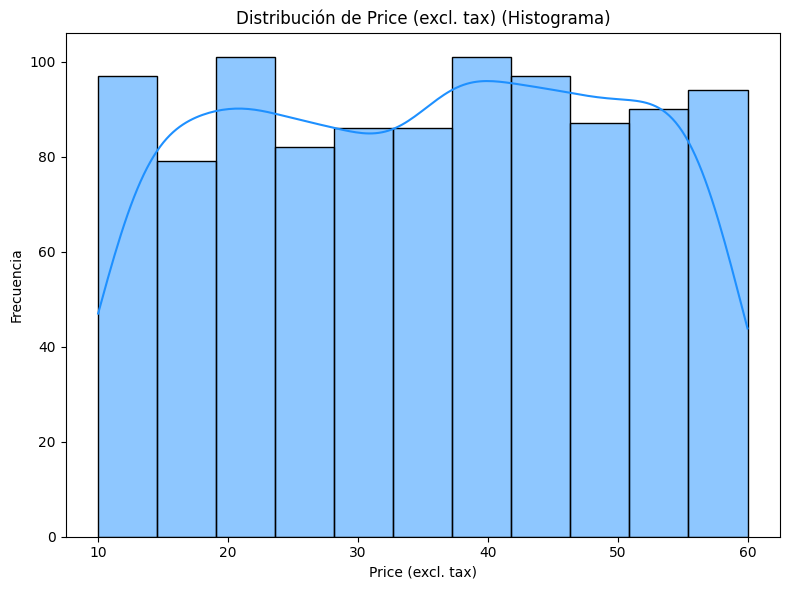

In [13]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn. ---
col = 'Price (excl. tax)'

# --- Histograma de Precio ---
plt.figure(figsize=(8, 6))
sns.histplot(df[col], kde=True, color='dodgerblue')
plt.title(f'Distribución de {col} (Histograma)')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

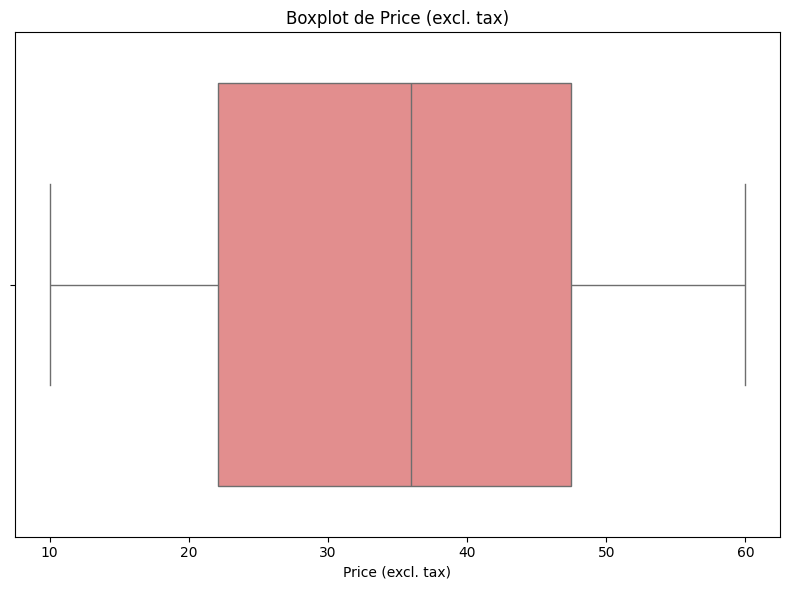

In [14]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn. ---
col = 'Price (excl. tax)'

# --- Boxplot de Precio ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[col], color='lightcoral')
plt.title(f'Boxplot de {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

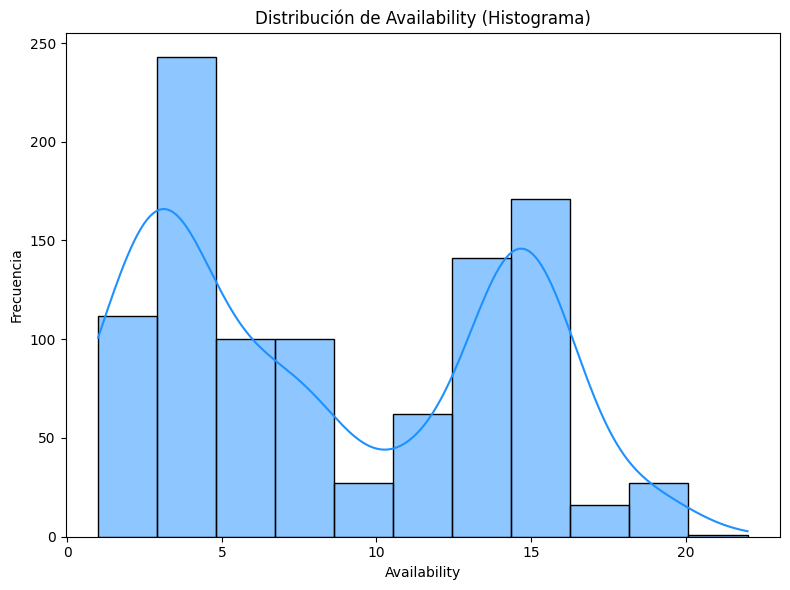

In [15]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn. ---
col = 'Availability'

# --- Histograma de Precio ---
plt.figure(figsize=(8, 6))
sns.histplot(df[col], kde=True, color='dodgerblue')
plt.title(f'Distribución de {col} (Histograma)')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

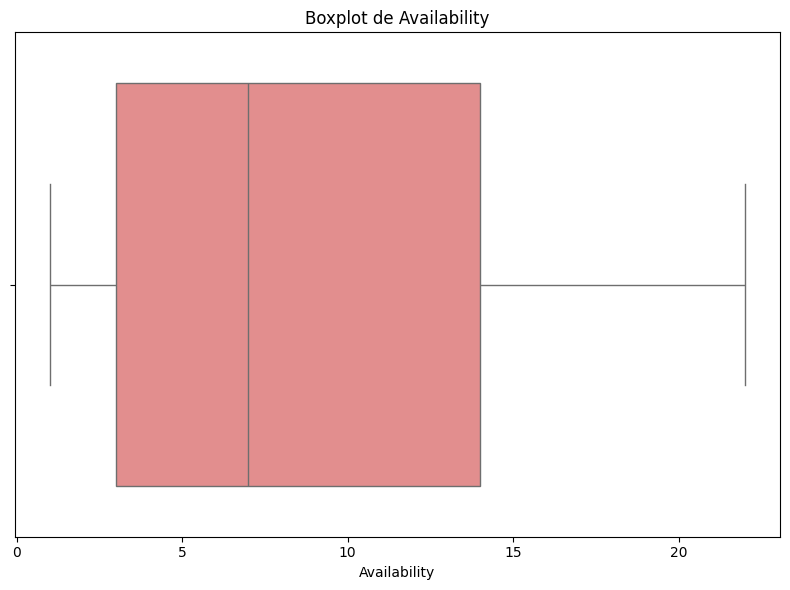

In [16]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn. ---
col = 'Availability'

# --- Boxplot de Precio ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[col], color='lightcoral')
plt.title(f'Boxplot de {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

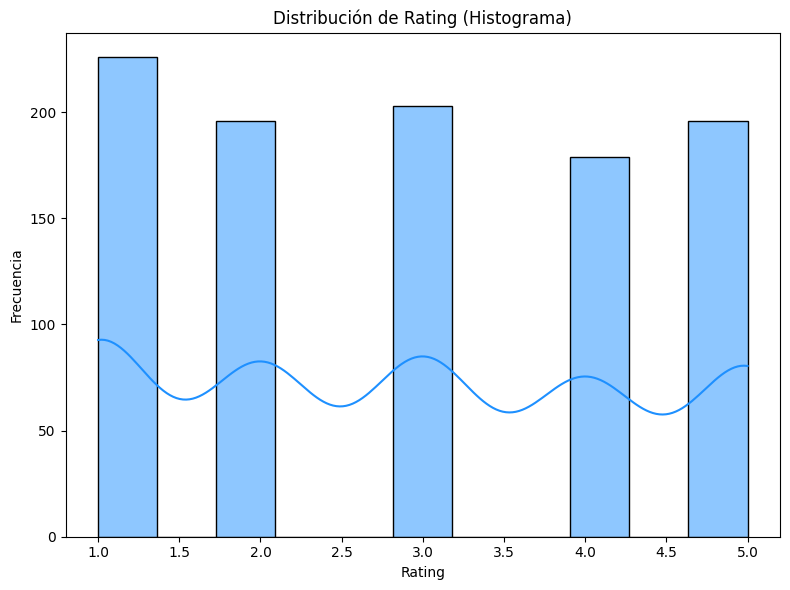

In [17]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn. ---
col = 'Rating'

# --- Histograma de Precio ---
plt.figure(figsize=(8, 6))
sns.histplot(df[col], kde=True, color='dodgerblue')
plt.title(f'Distribución de {col} (Histograma)')
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

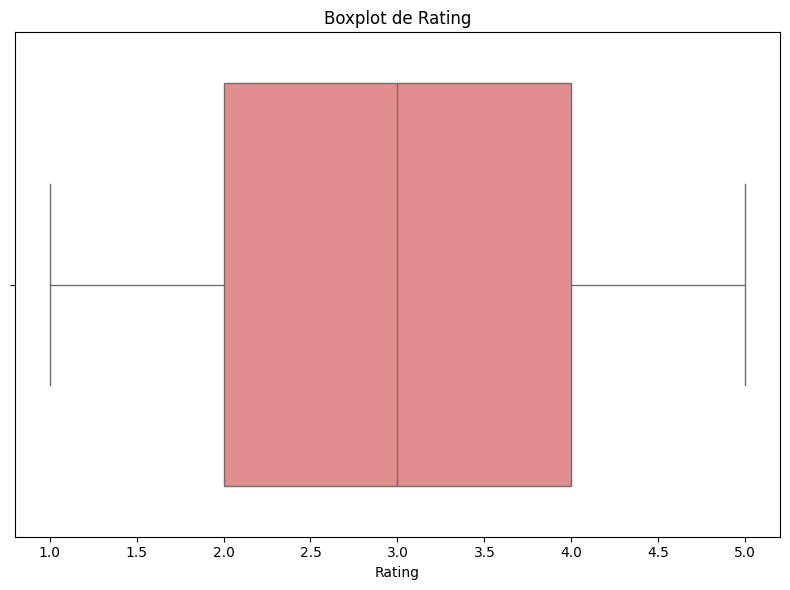

In [18]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn. ---
col = 'Rating'

# --- Boxplot de Precio ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[col], color='lightcoral')
plt.title(f'Boxplot de {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

Frecuencias de Variables Categóricas

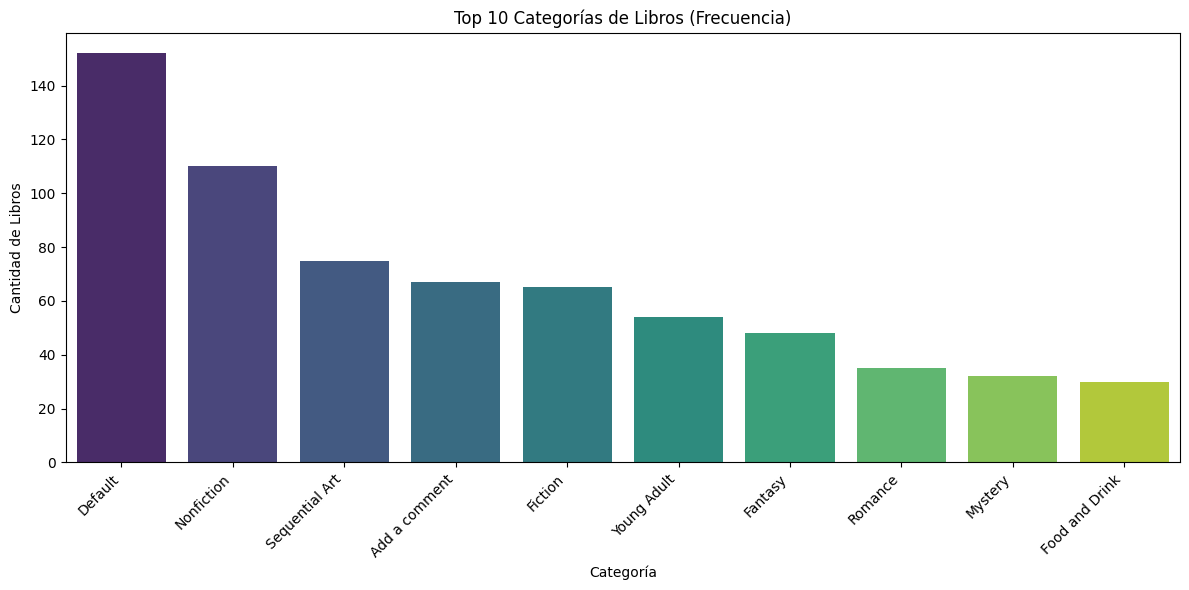

In [19]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn. ---
# Gráfica con Matplotlib "Frecuencia de Categorías de Libros"
plt.figure(figsize=(12, 6))
top_10_counts = category_counts.head(10)
sns.barplot(x=top_10_counts.index, y=top_10_counts.values, palette="viridis")
plt.title('Top 10 Categorías de Libros (Frecuencia)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Libros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Gráficas de Correlación y Relaciones

Heatmap

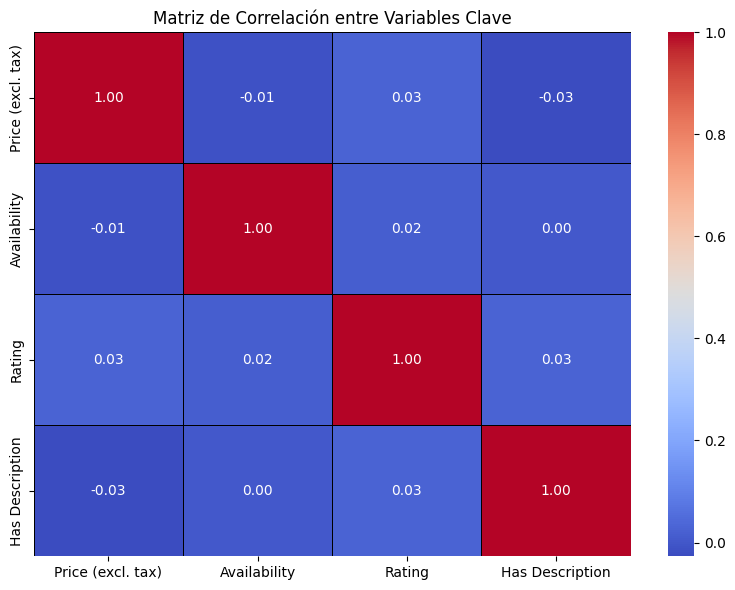

In [20]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn | estadística descriptiva/valores faltantes. ---
# Columnas para la correlación (asegúrate de que df['Has Description'] sea int)
correlation_features = ['Price (excl. tax)', 'Availability', 'Rating', 'Has Description']
correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Matriz de Correlación entre Variables Clave')
plt.tight_layout()
plt.show()

Scatterplot

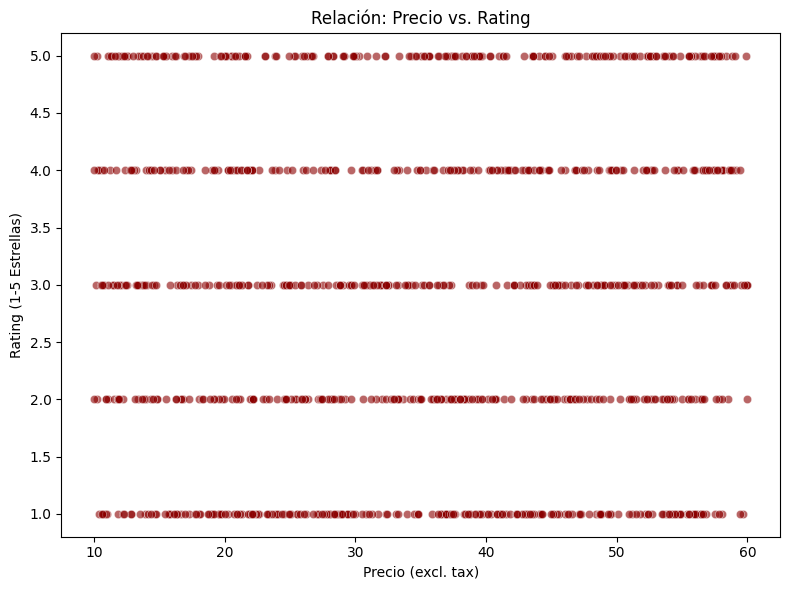

In [21]:
# --- Resumen del bloque: gráficas con Matplotlib | visualizaciones con Seaborn. ---
# Gráfica con Matplotlib Relación entre Precio y Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price (excl. tax)', y='Rating', data=df, alpha=0.6, color='darkred')
plt.title('Relación: Precio vs. Rating')
plt.xlabel('Precio (excl. tax)')
plt.ylabel('Rating (1-5 Estrellas)')
plt.tight_layout()
plt.show()

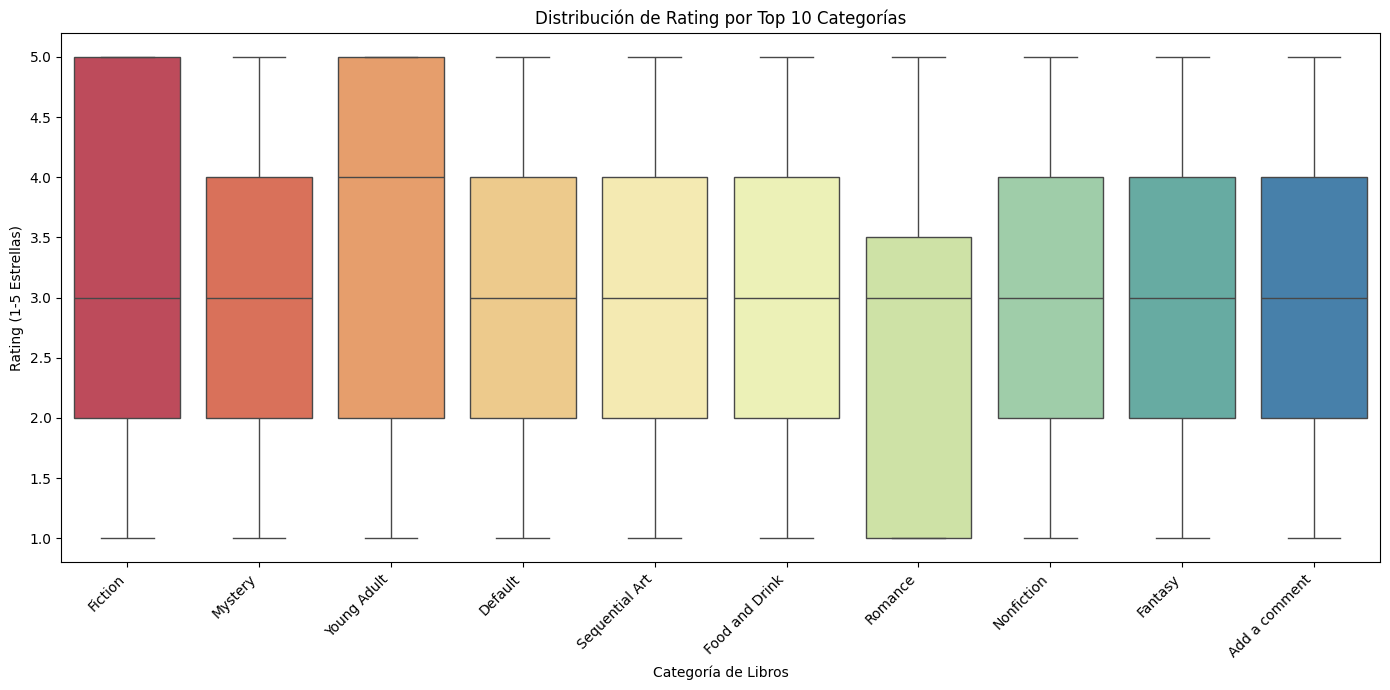

In [22]:
# 1. Identificar las 10 categorías más frecuentes para filtrar
category_cols = [col for col in df.columns if col.startswith('Category_')]
category_counts = df[category_cols].sum().sort_values(ascending=False)
top_10_cat_cols = category_counts.head(10).index.tolist()

# 2. Reestructurar el DataFrame para el gráfico
# Crear un DataFrame temporal con solo las categorías top y la columna 'Rating'
# Usaremos 'Rating' como ejemplo de variable a comparar.

# Creamos una columna 'Top Category' que contenga el nombre de la categoría si es una de las top 10
df['Top Category'] = None
for col in top_10_cat_cols:
    cat_name = col.replace('Category_', '')
    df.loc[df[col] == 1, 'Top Category'] = cat_name

# 3. Generar el Boxplot Agrupado (Rating por Categoría)
plt.figure(figsize=(14, 7))
# Filtramos solo los que están en el Top 10 para evitar el valor "None" (otras categorías)
df_top = df[df['Top Category'].notna()]

sns.boxplot(x='Top Category', y='Rating', data=df_top, palette='Spectral')
plt.title('Distribución de Rating por Top 10 Categorías')
plt.xlabel('Categoría de Libros')
plt.ylabel('Rating (1-5 Estrellas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

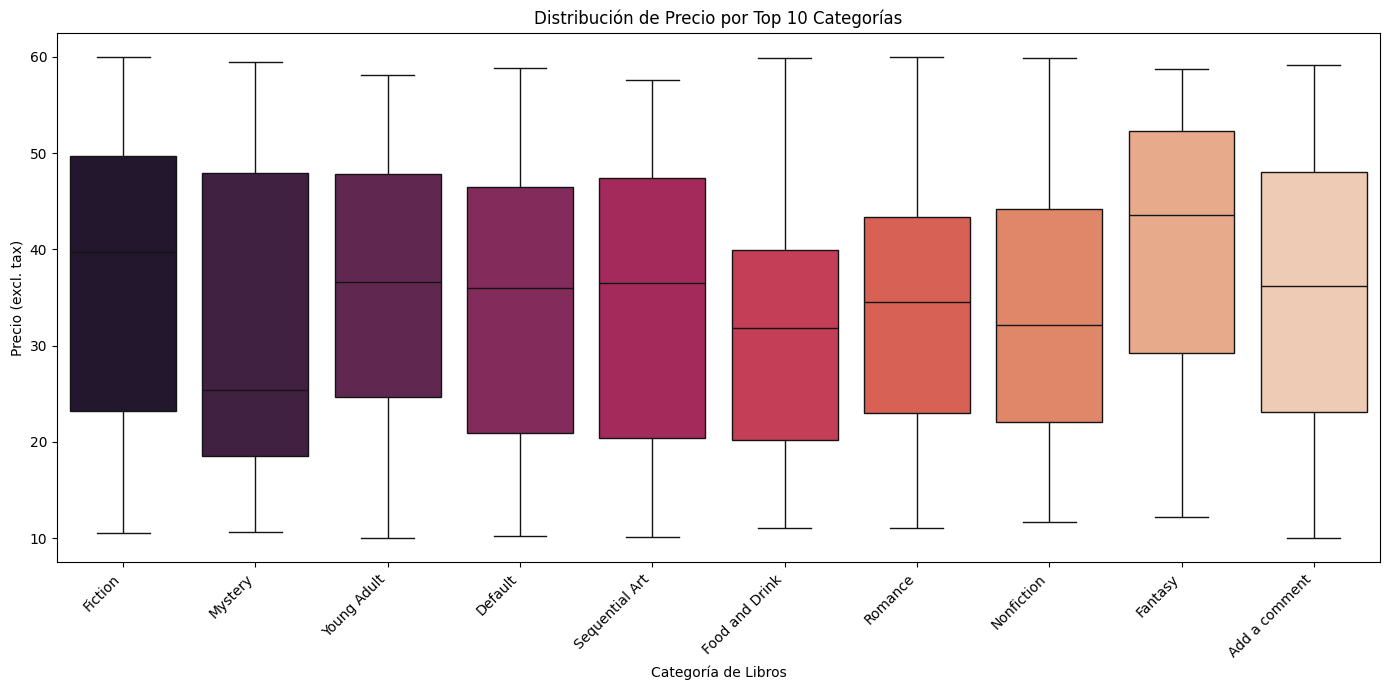

In [23]:
# 3. Generar el Boxplot Agrupado (Precio por Categoría)
# Gráfica con Matplotlib
plt.figure(figsize=(14, 7))
# Revisión de valores faltantes
df_top = df[df['Top Category'].notna()]

# Se grafica el Precio (excl. tax) en el eje Y
sns.boxplot(x='Top Category', y='Price (excl. tax)', data=df_top, palette='rocket')
plt.title('Distribución de Precio por Top 10 Categorías')
plt.xlabel('Categoría de Libros')
plt.ylabel('Precio (excl. tax)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()